In [9]:
from graspologic.datasets import load_drosophila_right
from graspologic.models import EdgeSwapper
from graspologic.plot import heatmap
from graspologic.utils import binarize, symmetrize
from graspologic.simulations import er_np
import networkx as nx
from tqdm import tqdm
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#load the data
adj, labels = load_drosophila_right(return_labels=True)
adj = symmetrize(adj)
adj = binarize(adj)
orig_adj = nx.from_numpy_array(adj)
assort_val = nx.degree_assortativity_coefficient(nx_adj)
print(assort_val)

-0.13211510523324294


In [11]:
n_samples = 100_000
mixing_time = 1000
assort_vals = []
swapper = EdgeSwapper(adj)
swapped_adj = np.zeros(adj.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
for i in tqdm(range(0, n_samples)):
    A, edge_list = swapper.swap_edges()
    if i % mixing_time == 0:
        new_G = nx.from_numpy_array(A)
        assort_vals.append(nx.degree_assortativity_coefficient(new_G))
        #save the first graph
        if i / mixing_time == 1:
            swapped_adj = new_G

100%|█████████████████████████████████| 100000/100000 [00:17<00:00, 5604.30it/s]


/opt/miniconda3/envs/kullah/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'assortativity values for drosophila')

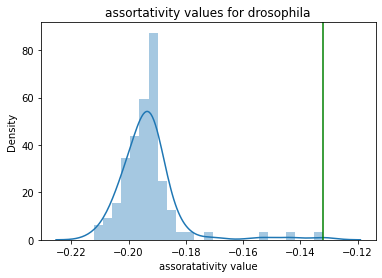

In [18]:
import seaborn as sns
ax = sns.distplot(assort_vals)
ax.axvline(assort_val, color = "green")
plt.xlabel("assoratativity value")
plt.title("assortativity values for drosophila")

In [16]:
print(list(orig_adj.degree()) == list(swapped_adj.degree()))

True
